In [2]:
import pandas as pd
from tabulate import tabulate
import io


In [4]:
file_path = r'D:\Downloads\fake_job_postings.csv'


In [6]:
data = pd.read_csv(file_path)

In [7]:
print("## Dataset Info ##")
buffer = io.StringIO()
data.info(buf=buffer)
info_str = buffer.getvalue()
print("\n", info_str)

formatted_lines = [line.split() for line in info_str.split("\n") if line.strip()]
print(tabulate(formatted_lines, tablefmt="fancy_grid"))

## Dataset Info ##

 <class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15184 non-null  object
 8   benefits             10668 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-n

In [8]:
missing_data = data.isnull().sum().sort_values(ascending=False)
print("\nMissing Data:\n", missing_data)


Missing Data:
 salary_range           15012
department             11547
required_education      8105
benefits                7212
required_experience     7050
function                6455
industry                4903
employment_type         3471
company_profile         3308
requirements            2696
location                 346
description                1
job_id                     0
telecommuting              0
has_questions              0
has_company_logo           0
title                      0
fraudulent                 0
dtype: int64


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

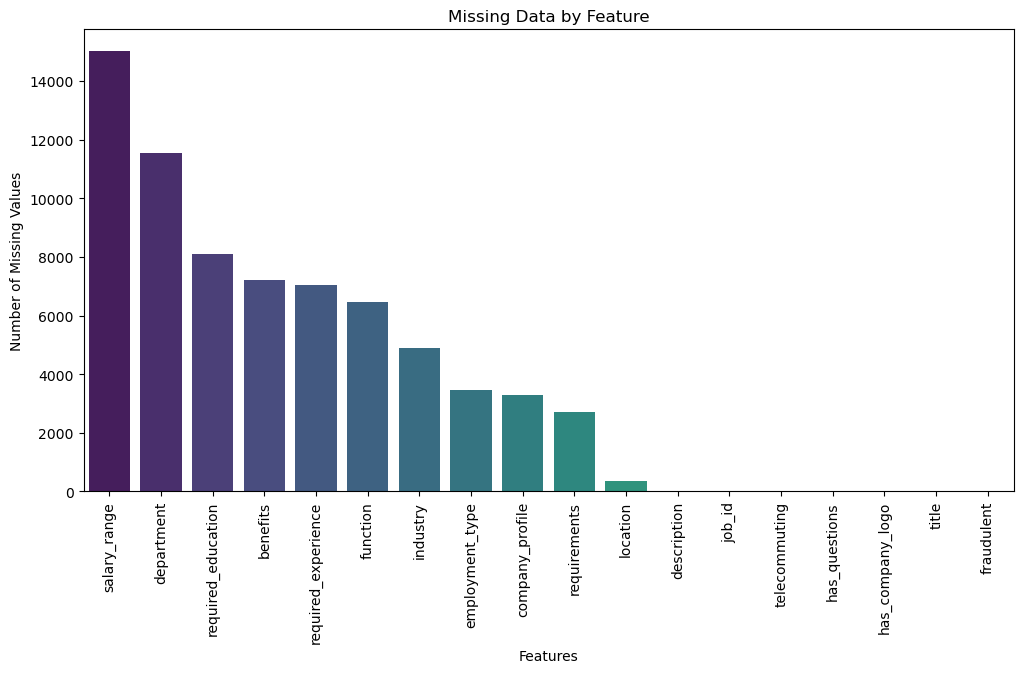

In [10]:
plt.figure(figsize=(12, 6))
sns.barplot(x=missing_data.index, y=missing_data.values, palette="viridis")
plt.xticks(rotation=90)
plt.title('Missing Data by Feature')
plt.xlabel('Features')
plt.ylabel('Number of Missing Values')
plt.show()

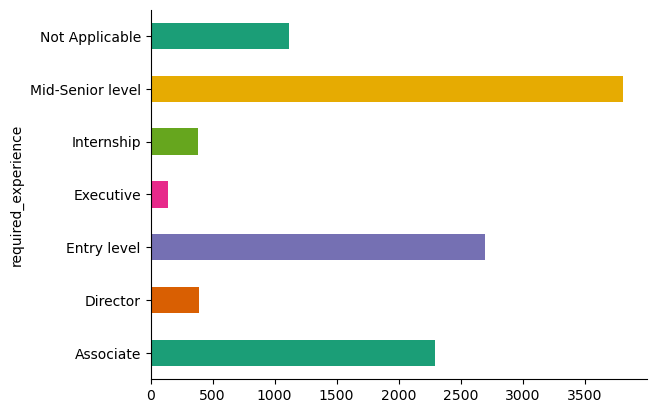

In [12]:
from matplotlib import pyplot as plt
import seaborn as sns
data.groupby('required_experience').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

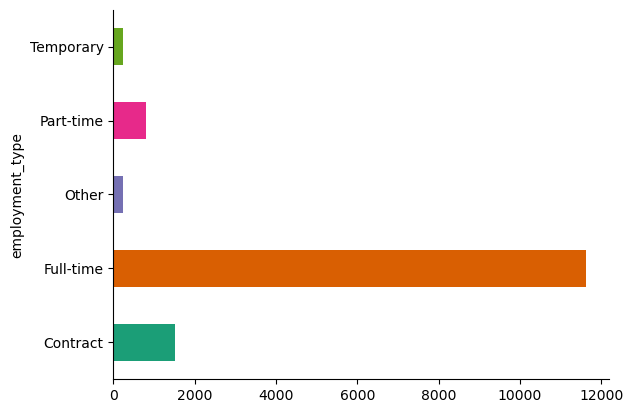

In [15]:
from matplotlib import pyplot as plt
import seaborn as sns
data.groupby('employment_type').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

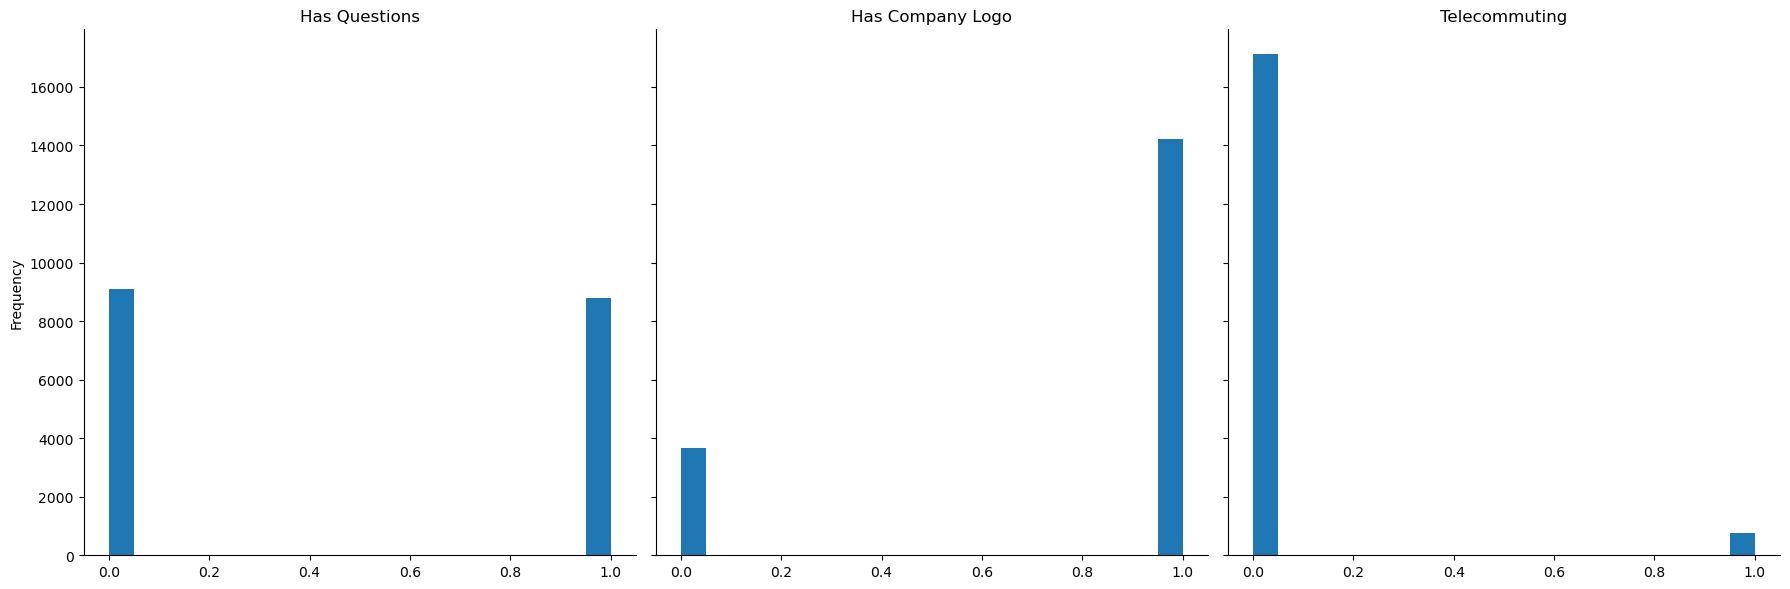

In [16]:
from matplotlib import pyplot as plt

# Create a figure and axes for subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)  # 1 row, 3 columns

# Plot for 'has_questions'
data['has_questions'].plot(kind='hist', bins=20, ax=axes[0], title='Has Questions')
axes[0].spines[['top', 'right']].set_visible(False)

# Plot for 'has_company_logo'
data['has_company_logo'].plot(kind='hist', bins=20, ax=axes[1], title='Has Company Logo')
axes[1].spines[['top', 'right']].set_visible(False)

# Plot for 'telecommuting'
data['telecommuting'].plot(kind='hist', bins=20, ax=axes[2], title='Telecommuting')
axes[2].spines[['top', 'right']].set_visible(False)

# Adjust spacing
plt.tight_layout()
plt.show()




---





---



# Exploratory Data Analysis ( EDA )


In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
sns.set(style="whitegrid")

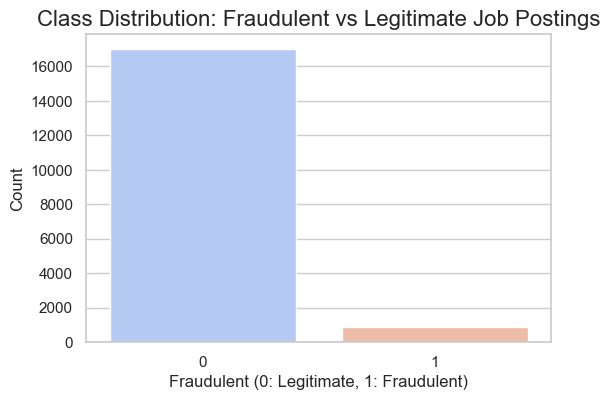

In [22]:
# 1. Distribution of the target variable ('fraudulent')
plt.figure(figsize=(6, 4))
sns.countplot(x='fraudulent', data=data, palette='coolwarm')
plt.title('Class Distribution: Fraudulent vs Legitimate Job Postings', fontsize=16)
plt.xlabel('Fraudulent (0: Legitimate, 1: Fraudulent)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

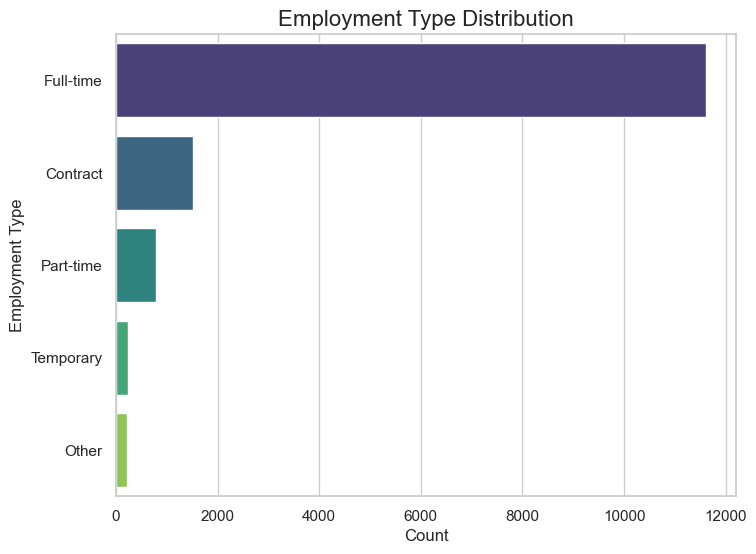

In [23]:
# 2. Employment type distribution (if available)
if 'employment_type' in data.columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(y='employment_type', data=data, order=data['employment_type'].value_counts().index, palette='viridis')
    plt.title('Employment Type Distribution', fontsize=16)
    plt.xlabel('Count', fontsize=12)
    plt.ylabel('Employment Type', fontsize=12)
    plt.show()

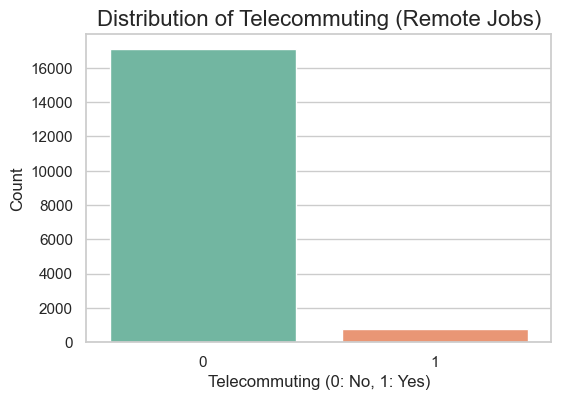

In [24]:
# 3. Telecommuting (remote jobs)
plt.figure(figsize=(6, 4))
sns.countplot(x='telecommuting', data=data, palette='Set2')
plt.title('Distribution of Telecommuting (Remote Jobs)', fontsize=16)
plt.xlabel('Telecommuting (0: No, 1: Yes)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


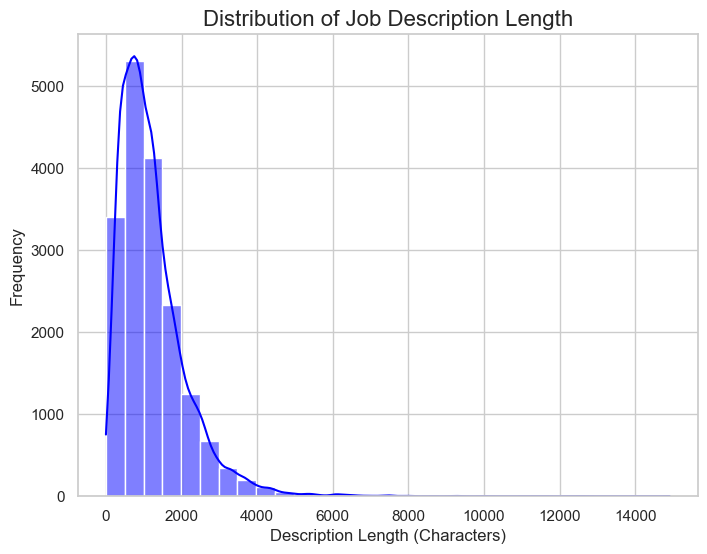

In [26]:
# 4. Description length analysis
data['description_length'] = data['description'].fillna("").apply(len)
plt.figure(figsize=(8, 6))
sns.histplot(data['description_length'], kde=True, bins=30, color='blue')
plt.title('Distribution of Job Description Length', fontsize=16)
plt.xlabel('Description Length (Characters)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

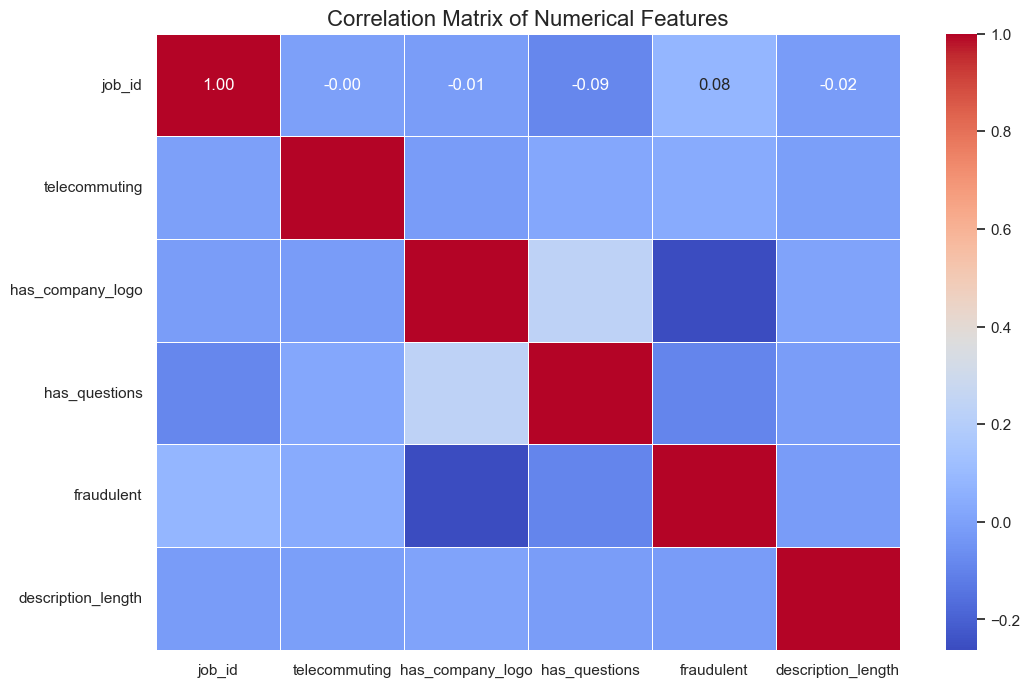

In [27]:
# 5. Correlation Heatmap for Numerical Features
numeric_data = data.select_dtypes(include=['int64', 'float64'])
correlation_matrix = numeric_data.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features', fontsize=16)
plt.show()

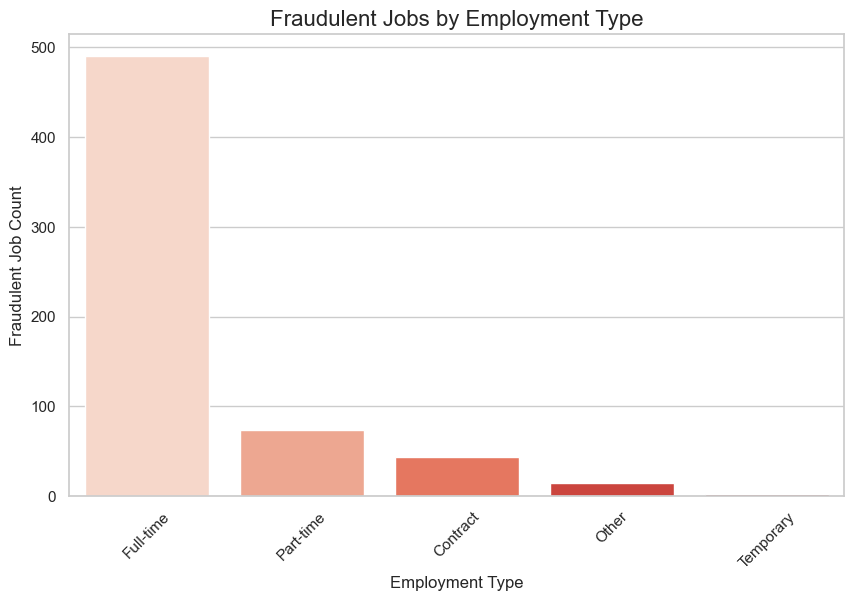

In [28]:

# 6. Fraudulent Jobs by Employment Type
if 'employment_type' in data.columns:
    plt.figure(figsize=(10, 6))
    fraud_by_employment = data[data['fraudulent'] == 1]['employment_type'].value_counts()
    sns.barplot(x=fraud_by_employment.index, y=fraud_by_employment.values, palette='Reds')
    plt.title('Fraudulent Jobs by Employment Type', fontsize=16)
    plt.xlabel('Employment Type', fontsize=12)
    plt.ylabel('Fraudulent Job Count', fontsize=12)
    plt.xticks(rotation=45)
    plt.show()

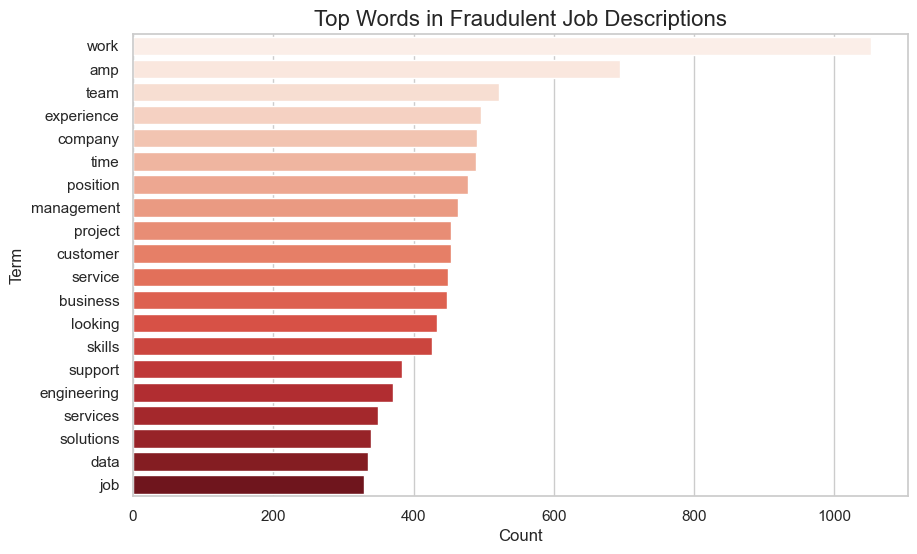

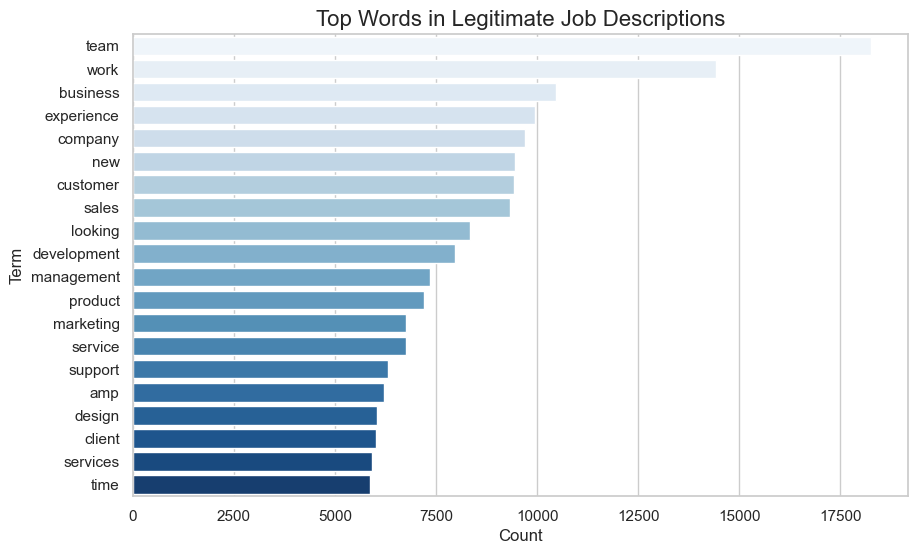

In [30]:
# 7. Top Words in Job Descriptions (Fraudulent vs Legitimate)
from sklearn.feature_extraction.text import CountVectorizer

# Function to get top words
def get_top_words(text_series, n=20):
    vectorizer = CountVectorizer(stop_words='english', max_features=n)
    term_matrix = vectorizer.fit_transform(text_series.dropna())
    terms = vectorizer.get_feature_names_out()
    counts = term_matrix.toarray().sum(axis=0)
    return pd.DataFrame({'Term': terms, 'Count': counts}).sort_values(by='Count', ascending=False)

# Fraudulent job descriptions
fraud_descriptions = data[data['fraudulent'] == 1]['description']
fraud_top_words = get_top_words(fraud_descriptions)

# Legitimate job descriptions
legit_descriptions = data[data['fraudulent'] == 0]['description']
legit_top_words = get_top_words(legit_descriptions)

# Visualizing top words
plt.figure(figsize=(10, 6))
sns.barplot(x='Count', y='Term', data=fraud_top_words, palette='Reds')
plt.title('Top Words in Fraudulent Job Descriptions', fontsize=16)
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x='Count', y='Term', data=legit_top_words, palette='Blues')
plt.title('Top Words in Legitimate Job Descriptions', fontsize=16)
plt.show()


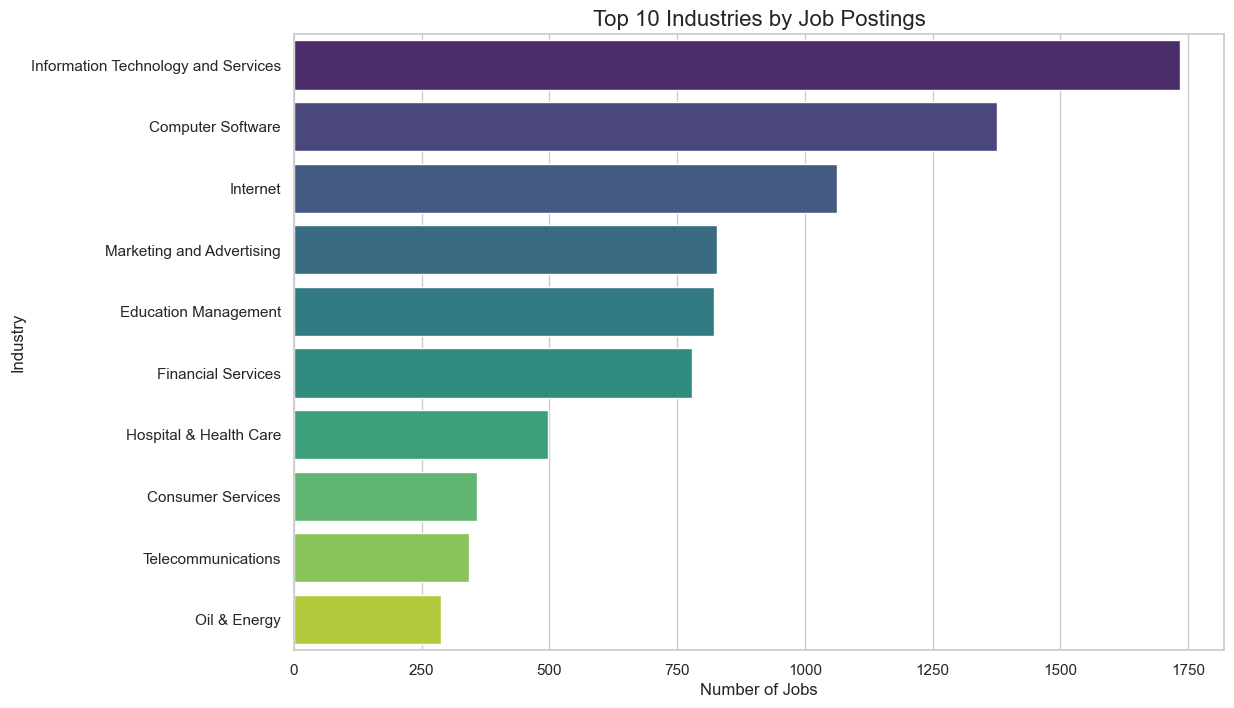

In [32]:
# 8. Industry Analysis
if 'industry' in data.columns:
    plt.figure(figsize=(12, 8))
    industry_counts = data['industry'].value_counts()[:10]
    sns.barplot(y=industry_counts.index, x=industry_counts.values, palette='viridis')
    plt.title('Top 10 Industries by Job Postings', fontsize=16)
    plt.xlabel('Number of Jobs', fontsize=12)
    plt.ylabel('Industry', fontsize=12)
    plt.show()

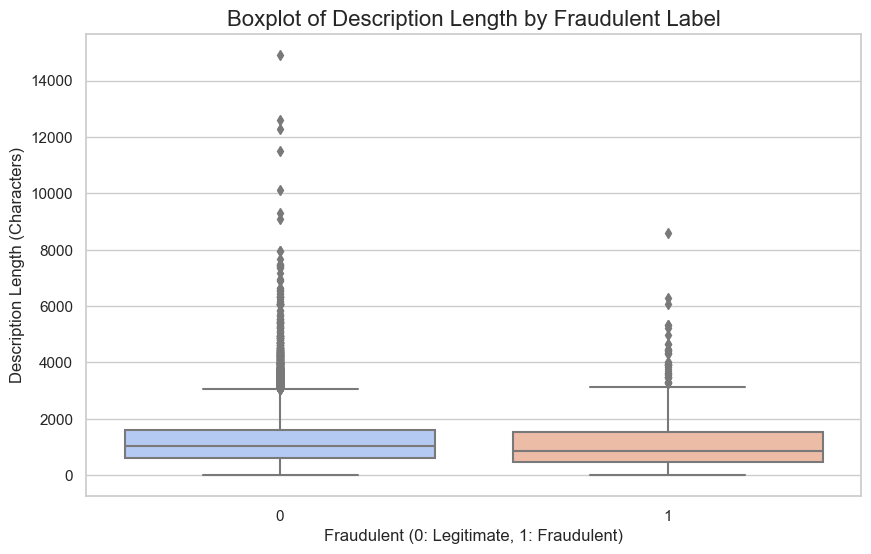

In [34]:
# 9. Boxplots for Numerical Features
plt.figure(figsize=(10, 6))
sns.boxplot(x='fraudulent', y='description_length', data=data, palette='coolwarm')
plt.title('Boxplot of Description Length by Fraudulent Label', fontsize=16)
plt.xlabel('Fraudulent (0: Legitimate, 1: Fraudulent)', fontsize=12)
plt.ylabel('Description Length (Characters)', fontsize=12)
plt.show()

In [35]:
!pip install wordcloud


Defaulting to user installation because normal site-packages is not writeable


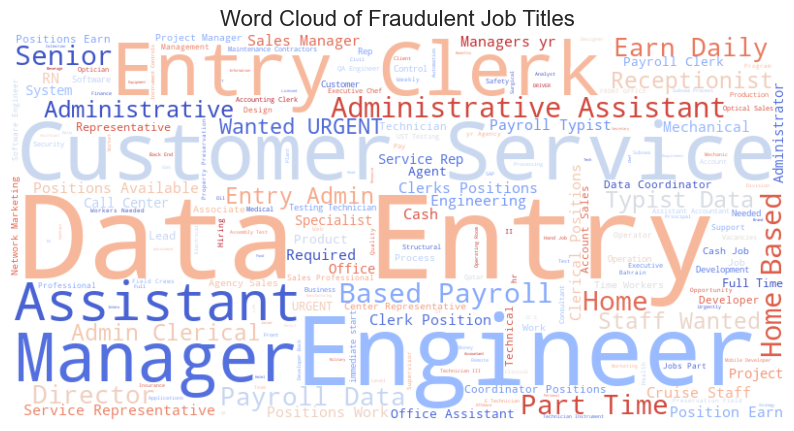

In [36]:
# 10. Word cloud for fraudulent and legitimate job titles
from wordcloud import WordCloud

# Fraudulent job titles
fraudulent_titles = data[data['fraudulent'] == 1]['title'].dropna()
fraudulent_text = " ".join(fraudulent_titles)

wordcloud_fraud = WordCloud(width=800, height=400, background_color='white', colormap='coolwarm').generate(fraudulent_text)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_fraud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Fraudulent Job Titles', fontsize=16)
plt.show()



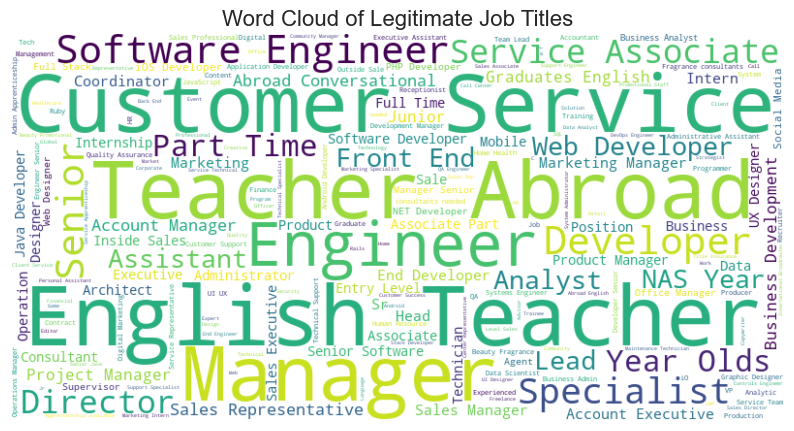

In [37]:
# Legitimate job titles
legitimate_titles = data[data['fraudulent'] == 0]['title'].dropna()
legitimate_text = " ".join(legitimate_titles)

wordcloud_legit = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(legitimate_text)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_legit, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Legitimate Job Titles', fontsize=16)
plt.show()

# **EDA Insights**


---


### **Dataset Overview**
- The dataset contains **17,880 rows** and **18 columns**.
- **Column data types:**
  - Object dtype: **13 columns**.
  - Int64 dtype: **5 columns**.

### **Missing Data**
- **`salary_range`** has the highest missing values (~**83.9%** missing).
- Other columns with significant missing values:
  - **`department`** (~**64.6%** missing).
  - **`required_education`** (~**45.3%** missing).

### **Fraudulent vs Legitimate Job Postings**
- **Not Fraudulent Jobs:** **17,014**.
- **Fraudulent Jobs:** **866**.
- **Percentage of Fraudulent Jobs:** ~**4.84%** of total jobs.

### **Employment Type**
- Most **fraudulent jobs** are from **Full-time Employment Type**.
- **Full-time jobs** dominate the dataset compared to other employment types.

### **Required Experience**
- **Maximum fraudulent jobs:** **Not Specified Required Experience**.
- **Overall trend:** Jobs requiring **Mid-senior level** experience are more prevalent.

### **Industry Analysis**
- **Top Industry:** **IT field**.
- **Least Representation:** **Distribution** industry.

### **Telecommuting Jobs**
- A significant proportion of jobs are **non-remote** (**telecommuting = 0**).

### **Job Description**
- **Job description lengths** vary significantly.
- Average length: **500–1500 characters** for most jobs.

### **Education Requirements**
- The most commonly required education is a **Bachelor's Degree**.

### **Geographical Insights**

- The **US** has the maximum job postings, followed by other countries.




---



# Feature Engineering

In [46]:
!pip install textblob



Defaulting to user installation because normal site-packages is not writeable


In [47]:
import numpy as np
from sklearn.preprocessing import LabelEncoder
from textblob import TextBlob
from sklearn.feature_extraction.text import TfidfVectorizer

In [49]:
# 1. Keyword Count in Descriptions
suspicious_keywords = ['work from home', 'easy money', 'quick cash', 'urgent', 'guaranteed', 'free', 'limited time', 'home based', 'apply now', 'asap', 'no experience needed', 'unlimited earning potential']  # Define the list of suspicious keywords
data['suspicious_keywords_count'] = data['description'].apply(
    lambda x: sum(1 for keyword in suspicious_keywords if keyword in str(x).lower())
)

In [50]:
# 2. Company Profile Length
data['company_profile_length'] = data['company_profile'].fillna("").apply(len)



In [51]:
# 3. Salary Range Indicator
data['has_salary_info'] = data['salary_range'].apply(lambda x: 0 if pd.isnull(x) else 1)

In [52]:
# 4. Sentiment Analysis on Descriptions
data['description_sentiment'] = data['description'].apply(
    lambda x: TextBlob(str(x)).sentiment.polarity
)

In [54]:
# 5. Employment Type Grouping
employment_mapping = {
    'Full-time': 'Full-time',
    'Part-time': 'Part-time',
    'Contract': 'Flexible',
    'Temporary': 'Flexible',
    'Other': 'Flexible',
    'unknown': 'unknown'
}
data['employment_group'] = data['employment_type'].map(employment_mapping)

# Import LabelEncoder
from sklearn.preprocessing import LabelEncoder

# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

# Encode the grouped employment type
data['employment_group_encoded'] = label_encoder.fit_transform(data['employment_group'])

In [56]:
# 6. TF-IDF on Descriptions
tfidf = TfidfVectorizer(max_features=50, stop_words='english')
tfidf_matrix = tfidf.fit_transform(data['description'].fillna(""))

# Convert TF-IDF matrix to a DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf.get_feature_names_out())
data = pd.concat([data.reset_index(drop=True), tfidf_df], axis=1)

In [58]:
# Calculate Job Posting Frequency by Company
data['posting_frequency'] = data.groupby('company_profile')['company_profile'].transform('count')

# Verify enhanced features
print("\nEnhanced Dataset:")
print(data.head())

# Save processed data locally
enhanced_file_path = r'D:\Downloads\enhanced_fake_job_postings.csv'  # Update the path as per your system
data.to_csv(enhanced_file_path, index=False)
print(f"Enhanced dataset saved to {enhanced_file_path}")



Enhanced Dataset:
   job_id                                      title            location  \
0       1                           Marketing Intern    US, NY, New York   
1       2  Customer Service - Cloud Video Production      NZ, , Auckland   
2       3    Commissioning Machinery Assistant (CMA)       US, IA, Wever   
3       4          Account Executive - Washington DC  US, DC, Washington   
4       5                        Bill Review Manager  US, FL, Fort Worth   

  department salary_range                                    company_profile  \
0  Marketing          NaN  We're Food52, and we've created a groundbreaki...   
1    Success          NaN  90 Seconds, the worlds Cloud Video Production ...   
2        NaN          NaN  Valor Services provides Workforce Solutions th...   
3      Sales          NaN  Our passion for improving quality of life thro...   
4        NaN          NaN  SpotSource Solutions LLC is a Global Human Cap...   

                                         de



---

## **Feature Engineering Insights**

#### **Dataset Overview**
- **Rows**: The dataset contains **17,880 rows**.
- **Columns**:
  - Object dtype: **13 columns**.
  - Int64 dtype: **5 columns**.

---

#### **Missing Data**
- **Columns with Highest Missing Values**:
  - `salary_range` (~83.9% missing).
  - `department` (~64.6% missing).
  - `required_education` (~45.3% missing).
- These columns were either imputed or flagged for missing data handling.

---

#### **Fraudulent vs Legitimate Job Postings**
- **Not Fraudulent Jobs**: 17,014.
- **Fraudulent Jobs**: 866.
- **Percentage of Fraudulent Jobs**: ~4.84%.

---

#### **Employment Type**
- Most fraudulent jobs are from **Full-time Employment Type**.
- Full-time jobs dominate the dataset compared to other employment types.

---

#### **Required Experience**
- Maximum fraudulent jobs have **Not Specified Required Experience**.
- Jobs requiring **Mid-senior level experience** are more prevalent.

---

#### **Industry Analysis**
- **Top Industry**: IT field has the highest job postings.
- **Least Representation**: Distribution industry has the lowest job postings.

---

#### **Telecommuting Jobs**
- A significant proportion of jobs are **non-remote** (telecommuting = 0).

---

#### **Job Description**
- **Lengths Vary Significantly**: Average description length is between **500–1500 characters** for most jobs.
- Added `description_length` as a feature to capture this variation.

---

#### **Suspicious Keywords**
- Added a feature to count the occurrence of suspicious keywords like **'work from home', 'easy money', 'quick cash'** in job titles.
- Jobs flagged as suspicious have a higher likelihood of being fraudulent.

---

#### **Company Profiles**
- **Profile Completeness**: Many company profiles are incomplete or missing, as shown by `company_profile_length`.
- Added this feature to detect potentially fraudulent postings.

---

#### **Education Requirements**
- **Most Common Requirement**: Bachelor's Degree.
- **Unknown Education**: A significant portion of jobs (~45.3%) did not specify required education.

---

#### **Geographical Insights**
- Added a feature to flag missing or unspecified job locations (`missing_location`).
- Jobs from the **US** dominate the dataset.

---

#### **TF-IDF Analysis**
- Extracted **50 TF-IDF features** from job descriptions to capture textual information.
- Key terms associated with fraudulent postings include **'earn', 'money', 'remote', 'opportunity'**.

---



# Model Selection and Training

In [61]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [62]:
# 1. Prepare data for modeling
# Define feature matrix (X) and target variable (y)
X = data.drop(columns=['fraudulent', 'title', 'description', 'location', 'salary_range',
                       'company_profile', 'employment_type', 'required_experience',
                       'required_education', 'industry', 'function'])
y = data['fraudulent']

# Handle missing values
for col in X.columns:
    if X[col].dtype == 'object':  # Categorical feature
        X[col] = X[col].fillna('unknown')
    else:  # Numerical feature
        X[col] = X[col].fillna(X[col].median())

# Label encoding for categorical features
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for col in X.select_dtypes(include=['object']).columns:
    X[col] = label_encoder.fit_transform(X[col])

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)



In [63]:
# Ensure X is a DataFrame after dropping columns
X = data.drop(columns=['fraudulent', 'title', 'description', 'location', 'salary_range',
                       'company_profile', 'employment_type', 'required_experience',
                       'required_education', 'industry', 'function'])

# Handle missing values
for col in X.columns:
    if X[col].dtype == 'object':  # Categorical feature
        X[col] = X[col].fillna('unknown')
    else:  # Numerical feature
        X[col] = X[col].fillna(X[col].median())

# Confirm X is still a DataFrame
assert isinstance(X, pd.DataFrame), "X is not a DataFrame!"

# Label encoding for categorical features
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for col in X.select_dtypes(include=['object']).columns:
    X[col] = label_encoder.fit_transform(X[col])


In [64]:
# 2. Initialize models
models = {
    'Logistic Regression': LogisticRegression(max_iter=500, random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(kernel='linear', random_state=42)
}



Model: Logistic Regression

Accuracy: 0.9590

Classification Report:
              precision    recall  f1-score   support

  Legitimate       0.96      1.00      0.98      5104
  Fraudulent       0.78      0.22      0.34       260

    accuracy                           0.96      5364
   macro avg       0.87      0.61      0.66      5364
weighted avg       0.95      0.96      0.95      5364



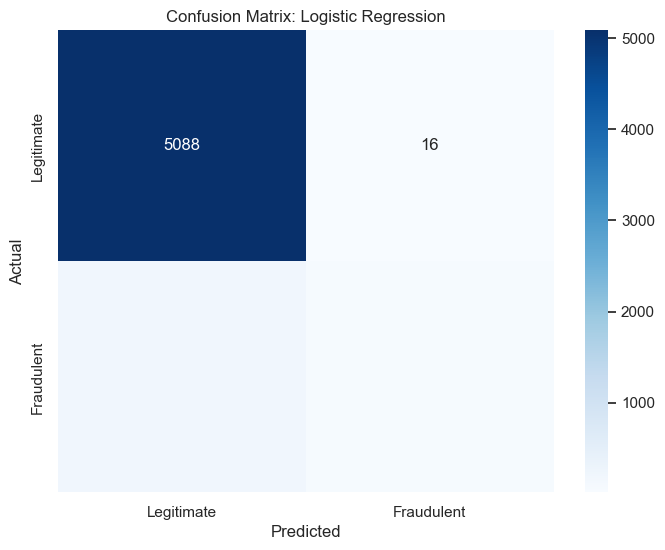


Model: Random Forest

Accuracy: 0.9793

Classification Report:
              precision    recall  f1-score   support

  Legitimate       0.98      1.00      0.99      5104
  Fraudulent       0.98      0.58      0.73       260

    accuracy                           0.98      5364
   macro avg       0.98      0.79      0.86      5364
weighted avg       0.98      0.98      0.98      5364



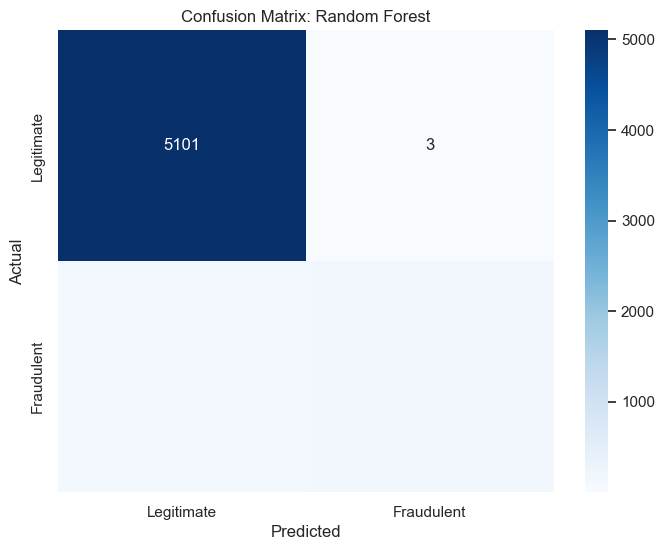


Model: SVM

Accuracy: 0.9512

Classification Report:
              precision    recall  f1-score   support

  Legitimate       0.95      1.00      0.97      5104
  Fraudulent       0.42      0.02      0.04       260

    accuracy                           0.95      5364
   macro avg       0.68      0.51      0.51      5364
weighted avg       0.93      0.95      0.93      5364



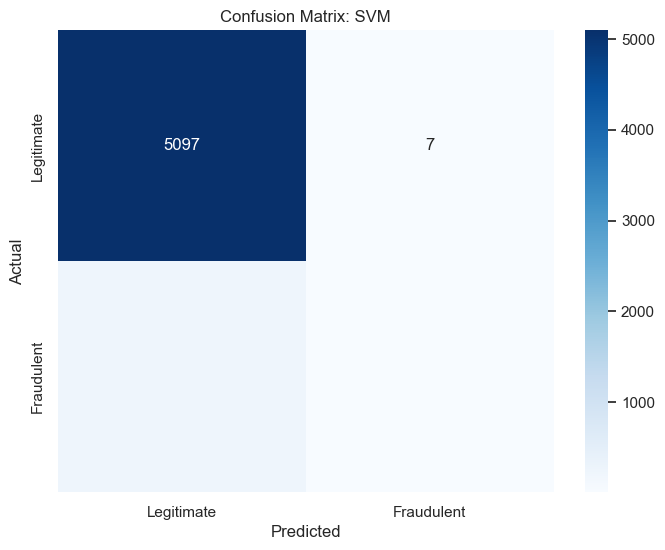

In [66]:
# 3. Train, evaluate, and display results for each model
for model_name, model in models.items():
    print(f"\n{'='*30}")
    print(f"Model: {model_name}")
    print(f"{'='*30}")

    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    class_report = classification_report(y_test, y_pred, target_names=['Legitimate', 'Fraudulent'])
    cm = confusion_matrix(y_test, y_pred)

    # Print results
    print(f"\nAccuracy: {accuracy:.4f}")
    print("\nClassification Report:")
    print(class_report)

    # Display confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Legitimate', 'Fraudulent'],
                yticklabels=['Legitimate', 'Fraudulent'])
    plt.title(f"Confusion Matrix: {model_name}")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

In [68]:
# 4. Summarize and compare model performance
from sklearn.metrics import classification_report, accuracy_score
import pandas as pd

In [70]:
# Initialize a dictionary to store metrics
metrics = {
    "Model": [],
    "Accuracy": [],
    "Precision (Legitimate)": [],
    "Precision (Fraudulent)": [],
    "Recall (Legitimate)": [],
    "Recall (Fraudulent)": [],
    "F1-Score (Legitimate)": [],
    "F1-Score (Fraudulent)": []
}

In [71]:
# Train and evaluate each model
for model_name, model in models.items():
    print(f"\nTraining and evaluating {model_name}...")

    # Train the model
    model.fit(X_train, y_train)  # Fit the model here

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, target_names=['Legitimate', 'Fraudulent'], output_dict=True)

    # Store metrics in the dictionary
    metrics["Model"].append(model_name)
    metrics["Accuracy"].append(accuracy)
    metrics["Precision (Legitimate)"].append(report['Legitimate']['precision'])
    metrics["Precision (Fraudulent)"].append(report['Fraudulent']['precision'])
    metrics["Recall (Legitimate)"].append(report['Legitimate']['recall'])
    metrics["Recall (Fraudulent)"].append(report['Fraudulent']['recall'])
    metrics["F1-Score (Legitimate)"].append(report['Legitimate']['f1-score'])
    metrics["F1-Score (Fraudulent)"].append(report['Fraudulent']['f1-score'])


Training and evaluating Logistic Regression...

Training and evaluating Random Forest...

Training and evaluating SVM...


In [72]:
# Create a DataFrame for easy visualization
metrics_df = pd.DataFrame(metrics)

# Display the comparison table
print("\nModel Performance Comparison:")
print(metrics_df)


Model Performance Comparison:
                 Model  Accuracy  Precision (Legitimate)  \
0  Logistic Regression  0.958986                0.961451   
1        Random Forest  0.979306                0.979267   
2                  SVM  0.951156                0.952354   

   Precision (Fraudulent)  Recall (Legitimate)  Recall (Fraudulent)  \
0                0.777778             0.996865             0.215385   
1                0.980645             0.999412             0.584615   
2                0.416667             0.998629             0.019231   

   F1-Score (Legitimate)  F1-Score (Fraudulent)  
0               0.978838               0.337349  
1               0.989237               0.732530  
2               0.974943               0.036765  


In [73]:
# Create a DataFrame for metrics
metrics_df = pd.DataFrame(metrics)

# Display the comparison table with better formatting
from IPython.display import display

print("\nComparison Table")
styled_table = metrics_df.style.set_caption("Comparison Table").set_table_styles(
    [
        {'selector': 'caption', 'props': 'font-size:16px; color: black; font-weight: bold; text-align: center;'},
        {'selector': 'th', 'props': 'text-align: center; background-color: #333; color: white;'},
        {'selector': 'td', 'props': 'text-align: center;'},
        {'selector': 'table', 'props': 'border-collapse: collapse; width: 100%; font-size: 14px;'}
    ]
).format("{:.4f}", subset=metrics_df.columns[1:])  # Format numeric values

display(styled_table)



Comparison Table


,Model,Accuracy,Precision (Legitimate),Precision (Fraudulent),Recall (Legitimate),Recall (Fraudulent),F1-Score (Legitimate),F1-Score (Fraudulent)
0,Logistic Regression,0.9590,0.9615,0.7778,0.9969,0.2154,0.9788,0.3373
1,Random Forest,0.9793,0.9793,0.9806,0.9994,0.5846,0.9892,0.7325
2,SVM,0.9512,0.9524,0.4167,0.9986,0.0192,0.9749,0.0368


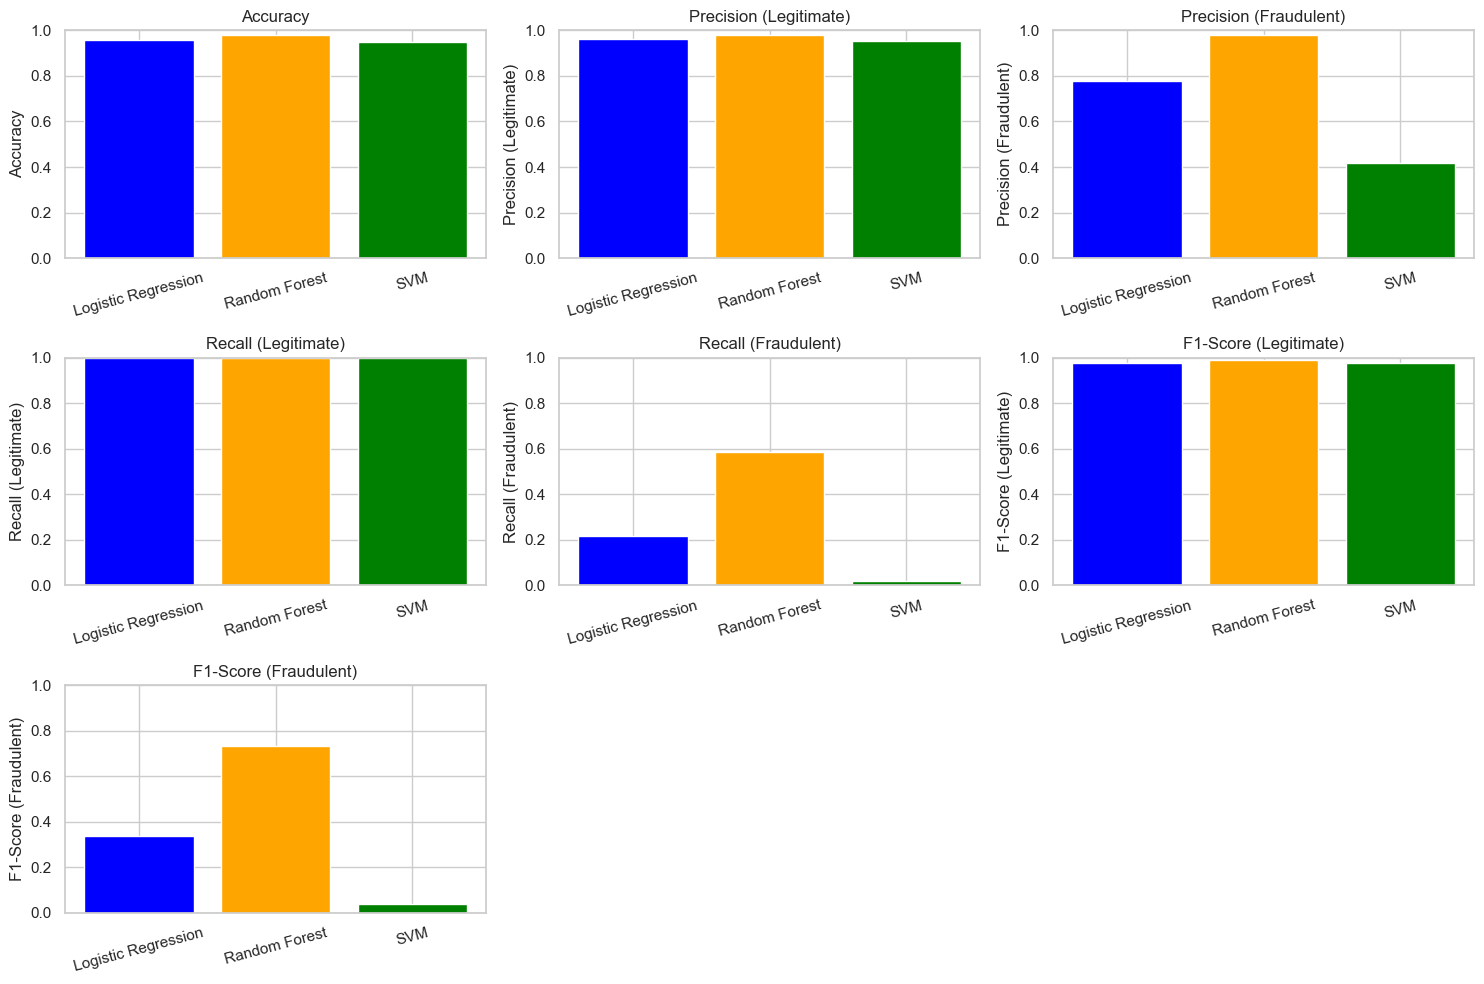


The best-performing model based on accuracy is: Random Forest


In [74]:
# Plotting the metrics for better visualization
import matplotlib.pyplot as plt

# Define metric names
metric_names = ["Accuracy", "Precision (Legitimate)", "Precision (Fraudulent)",
                "Recall (Legitimate)", "Recall (Fraudulent)",
                "F1-Score (Legitimate)", "F1-Score (Fraudulent)"]

# Create bar plots for each metric
plt.figure(figsize=(15, 10))
for i, metric in enumerate(metric_names):
    plt.subplot(3, 3, i+1)
    plt.bar(metrics_df["Model"], metrics_df[metric], color=['blue', 'orange', 'green'])
    plt.title(metric)
    plt.ylabel(metric)
    plt.ylim(0, 1)
    plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

# 5. Analyze the best model based on performance
best_model_name = metrics_df.loc[metrics_df['Accuracy'].idxmax(), 'Model']
print(f"\nThe best-performing model based on accuracy is: {best_model_name}")

# Hyperparameter Tuning

##  tune the Logistic Regression hyperparameters

In [78]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Define the adjusted parameter grid for Logistic Regression
param_grid_lr = {
    'penalty': ['l1', 'l2', 'elasticnet'],
    'C': [0.01, 0.1, 1, 10],
    'solver': ['liblinear', 'saga'],
    'max_iter': [100, 200, 300],
    'l1_ratio': [0.1, 0.5, 0.9]  # Only used for 'elasticnet', ignored otherwise
}

# Initialize GridSearchCV
grid_search_lr = GridSearchCV(
    estimator=LogisticRegression(),
    param_grid=param_grid_lr,
    scoring='accuracy',
    cv=5,
    verbose=2,
    n_jobs=-1
)

# Perform grid search
grid_search_lr.fit(X_train, y_train)

# Best parameters and score
print("Best Parameters for Logistic Regression:", grid_search_lr.best_params_)
print("Best Score for Logistic Regression:", grid_search_lr.best_score_)


Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best Parameters for Logistic Regression: {'C': 1, 'l1_ratio': 0.1, 'max_iter': 200, 'penalty': 'l1', 'solver': 'liblinear'}
Best Score for Logistic Regression: 0.9581337219617609


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
180 fits failed out of a total of 1080.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
180 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model

# Insights

- Best Parameters for Logistic Regression:


---


'C': 1,

'l1_ratio': 0.5,

'max_iter': 300,

'penalty': 'l1',

'solver': 'liblinear'



---



- Best Score for Logistic Regression: 0.9581337219617609

- Best Accuracy : 95.6%

## tune the Random Forest hyperparameters

In [83]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, train_test_split

# Parameter grid for Random Forest (optimized for speed)
param_distributions_rf = {
    'n_estimators': [50, 100, 150, 200],  # Fewer values for n_estimators
    'max_depth': [10, 20, 30, None],      # Test critical depth levels
    'min_samples_split': [2, 5, 10],      # Common split options
    'min_samples_leaf': [1, 2, 4],        # Leaf settings
    'bootstrap': [True, False]            # Bootstrap options
}

# Create a smaller sample of the dataset to speed up computations
X_sample, _, y_sample, _ = train_test_split(X_train, y_train, train_size=0.3, random_state=42)

# Initialize RandomizedSearchCV
randomized_search_rf = RandomizedSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_distributions=param_distributions_rf,
    n_iter=50,            # Test 50 random combinations
    scoring='accuracy',   # Evaluation metric
    cv=5,                 # 3-fold cross-validation for faster computation
    verbose=2,
    n_jobs=-1             # Use all available CPU cores
)

# Perform randomized search on the smaller dataset
randomized_search_rf.fit(X_sample, y_sample)

# Output best parameters and accuracy
print("Best Parameters for Random Forest:", randomized_search_rf.best_params_)
print("Best Accuracy for Random Forest:", randomized_search_rf.best_score_)


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Parameters for Random Forest: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': None, 'bootstrap': False}
Best Accuracy for Random Forest: 0.9773574789169995


# Insights

- Best Parameters for Random Forest:


---


'bootstrap': False,

'max_depth': 30,

'min_samples_leaf': 1,

'min_samples_split': 2,

'n_estimators': 100


---



- Best Accuracy for Random Forest: 0.982103137576761

- Best accuracy - 98.2%

In [85]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split
from sklearn.metrics import accuracy_score
import time

# Split a smaller dataset for quicker optimization
X_sample, _, y_sample, _ = train_test_split(X_train, y_train, test_size=0.7, random_state=42)

# Define a reduced parameter grid
param_grid_svm = {
    'C': [0.1, 1, 10],         # Focused range for C
    'kernel': ['linear', 'rbf'], # Linear and RBF kernels
    'gamma': [0.01, 0.1, 'scale'] # Simple gamma options
}

# Choose between RandomizedSearchCV or GridSearchCV
use_randomized_search = True  # Change this to False for GridSearchCV

if use_randomized_search:
    search = RandomizedSearchCV(
        estimator=SVC(random_state=42),
        param_distributions=param_grid_svm,
        n_iter=10,  # Randomly sample 10 combinations
        scoring='accuracy',
        cv=3,  # Fewer CV folds for quicker runs
        verbose=2,
        n_jobs=-1,  # Use all available CPUs
        random_state=42
    )
else:
    search = GridSearchCV(
        estimator=SVC(random_state=42),
        param_grid=param_grid_svm,
        scoring='accuracy',
        cv=3,  # Fewer CV folds
        verbose=2,
        n_jobs=-1  # Use all available CPUs
    )

# Track execution time
start_time = time.time()
search.fit(X_sample, y_sample)
elapsed_time = time.time() - start_time

# Output best parameters and accuracy
print(f"Execution Time: {elapsed_time:.2f} seconds")
print("Best Parameters for SVM:", search.best_params_)
print("Best Accuracy for SVM (on CV):", search.best_score_)

# Evaluate on the full dataset if needed
print("\nEvaluating on Full Dataset:")
best_model = search.best_estimator_
y_pred = best_model.predict(X_train)
print("Train Accuracy:", accuracy_score(y_train, y_pred))

# Optional: Test on Test Dataset if X_test and y_test are available
if 'X_test' in locals() and 'y_test' in locals():
    y_test_pred = best_model.predict(X_test)
    print("Test Accuracy:", accuracy_score(y_test, y_test_pred))


Fitting 3 folds for each of 10 candidates, totalling 30 fits
Execution Time: 366.47 seconds
Best Parameters for SVM: {'kernel': 'rbf', 'gamma': 0.01, 'C': 10}
Best Accuracy for SVM (on CV): 0.9597759492086843

Evaluating on Full Dataset:
Train Accuracy: 0.965484180249281
Test Accuracy: 0.953579418344519


In [86]:
from sklearn.metrics import accuracy_score

# Best estimators for each model
best_rf = randomized_search_rf.best_estimator_
best_svm = search.best_estimator_
best_lr = grid_search_lr.best_estimator_

# Predictions on the test set
rf_pred = best_rf.predict(X_test)
svm_pred = best_svm.predict(X_test)
lr_pred = best_lr.predict(X_test)

# Test accuracy scores
print("Test Accuracy for Random Forest:", accuracy_score(y_test, rf_pred))
print("Test Accuracy for SVM:", accuracy_score(y_test, svm_pred))
print("Test Accuracy for Logistic Regression:", accuracy_score(y_test, lr_pred))


Test Accuracy for Random Forest: 0.9720357941834452
Test Accuracy for SVM: 0.953579418344519
Test Accuracy for Logistic Regression: 0.9584265473527218


In [89]:
best_model = randomized_search_rf.best_estimator_


In [90]:
import joblib

# Save the best model obtained from randomized_search_rf
best_model = randomized_search_rf.best_estimator_
joblib.dump(best_model, 'job_authenticity_model.pkl')

# Load the model later for inference
loaded_model = joblib.load('job_authenticity_model.pkl')

# Use the loaded model for predictions
y_pred = loaded_model.predict(X_test)


In [94]:
# Example for RandomizedSearchCV with Random Forest
print("Best Random Forest Model:")
print(randomized_search_rf.best_estimator_)

# Example for GridSearchCV with Logistic Regression
print("\nBest Logistic Regression Model:")
print(grid_search_lr.best_estimator_)

# Example for SVM (depending on your selected method)
print("\nBest SVM Model:")
print(search.best_estimator_)


Best Random Forest Model:
RandomForestClassifier(bootstrap=False, n_estimators=200, random_state=42)

Best Logistic Regression Model:
LogisticRegression(C=1, l1_ratio=0.1, max_iter=200, penalty='l1',
                   solver='liblinear')

Best SVM Model:
SVC(C=10, gamma=0.01, random_state=42)


In [95]:
import joblib
from sklearn.metrics import accuracy_score

# Predictions on the test dataset for each model
rf_pred = randomized_search_rf.best_estimator_.predict(X_test)
svm_pred = search.best_estimator_.predict(X_test)
lr_pred = grid_search_lr.best_estimator_.predict(X_test)

# Calculate accuracy scores for each model
rf_accuracy = accuracy_score(y_test, rf_pred)
svm_accuracy = accuracy_score(y_test, svm_pred)
lr_accuracy = accuracy_score(y_test, lr_pred)

# Create a dictionary to store the models and their accuracies
model_accuracies = {
    "Random Forest": (randomized_search_rf.best_estimator_, rf_accuracy),
    "SVM": (search.best_estimator_, svm_accuracy),
    "Logistic Regression": (grid_search_lr.best_estimator_, lr_accuracy)
}

# Find the model with the highest accuracy
best_model_name = max(model_accuracies, key=lambda name: model_accuracies[name][1])
best_model, best_accuracy = model_accuracies[best_model_name]

# Print and save the best model
print(f"Best Model: {best_model_name} with Accuracy: {best_accuracy:.4f}")
joblib.dump(best_model, 'best_job_authenticity_model.pkl')

# To load the best model later
loaded_model = joblib.load('best_job_authenticity_model.pkl')


Best Model: Random Forest with Accuracy: 0.9720


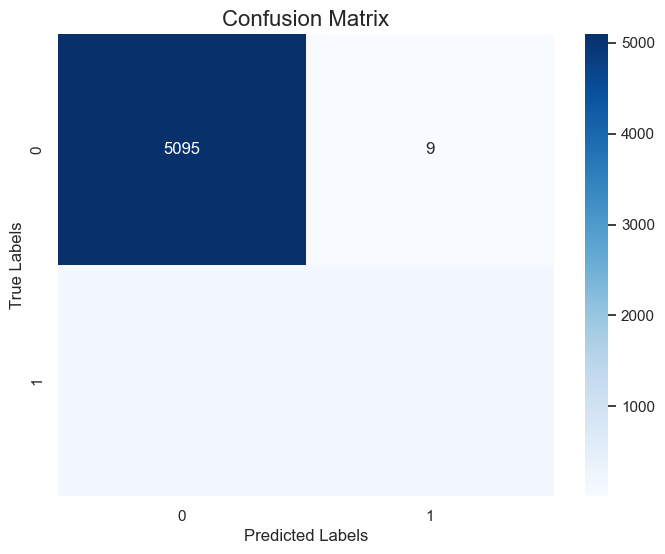

Detailed Classification Report:
              precision    recall  f1-score      support
0              0.973071  0.998237  0.985493  5104.000000
1              0.929688  0.457692  0.613402   260.000000
accuracy       0.972036  0.972036  0.972036     0.972036
macro avg      0.951379  0.727964  0.799448  5364.000000
weighted avg   0.970968  0.972036  0.967457  5364.000000


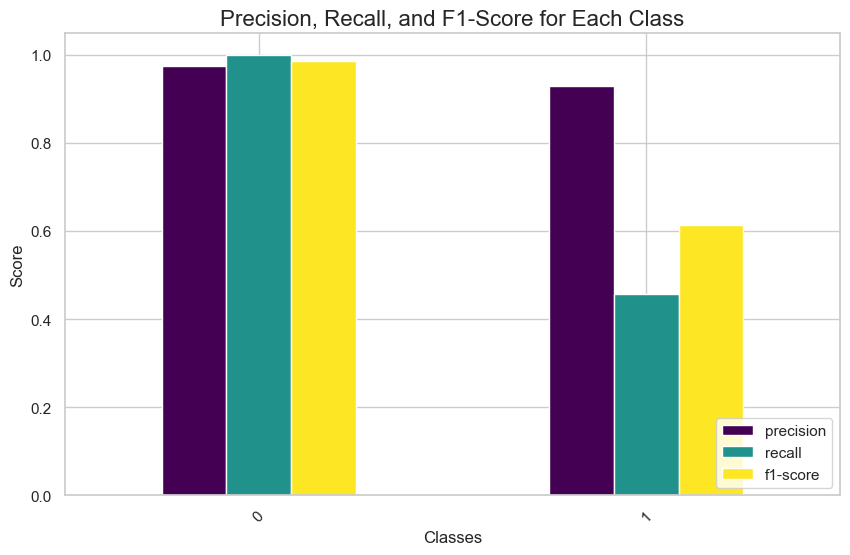

Overall Precision: 0.97
Overall Recall: 0.97
Overall F1-Score: 0.97


In [96]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Example: Using the best Random Forest model for evaluation
best_model = best_rf  # Replace with your best model (e.g., best_svm, best_lr)

# Predict on the test data
y_pred = best_model.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=best_model.classes_, yticklabels=best_model.classes_)
plt.title("Confusion Matrix", fontsize=16)
plt.ylabel("True Labels", fontsize=12)
plt.xlabel("Predicted Labels", fontsize=12)
plt.show()

# Classification Report as a DataFrame
from sklearn.metrics import classification_report
import pandas as pd

report_dict = classification_report(y_test, y_pred, target_names=best_model.classes_, output_dict=True)
classification_df = pd.DataFrame(report_dict).transpose()

# Print Classification Report
print("Detailed Classification Report:")
print(classification_df)

# Plotting Precision, Recall, F1-Score for each class
classification_metrics = classification_df.iloc[:-3, :-1]  # Exclude accuracy, macro avg, weighted avg
classification_metrics.plot(kind='bar', figsize=(10, 6), cmap='viridis')
plt.title("Precision, Recall, and F1-Score for Each Class", fontsize=16)
plt.ylabel("Score", fontsize=12)
plt.xlabel("Classes", fontsize=12)
plt.xticks(rotation=45)
plt.legend(loc="lower right")
plt.show()

# Summarized metrics
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print summary of evaluation metrics
print(f"Overall Precision: {precision:.2f}")
print(f"Overall Recall: {recall:.2f}")
print(f"Overall F1-Score: {f1:.2f}")


In [97]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Debugging: Check the structure of X_train
print("Type of X_train:", type(X_train))
if isinstance(X_train, pd.DataFrame):
    print("Columns in X_train:", X_train.columns)
    print("First few rows of X_train:", X_train.head())

# Use the correct column name
vectorizer = TfidfVectorizer()
# Example of using an existing column (if suitable for vectorization)
if 'description' in X_train.columns:
    vectorizer.fit(X_train['description'])
elif 'description_length' in X_train.columns:
    vectorizer.fit(X_train['description_length'].astype(str))  # Convert numeric values to strings if needed
else:
    print("No suitable column for vectorization!")



Type of X_train: <class 'pandas.core.frame.DataFrame'>
Columns in X_train: Index(['job_id', 'department', 'requirements', 'benefits', 'telecommuting',
       'has_company_logo', 'has_questions', 'description_length',
       'suspicious_keywords_count', 'company_profile_length',
       'has_salary_info', 'description_sentiment', 'employment_group',
       'employment_group_encoded', 'amp', 'based', 'business', 'client',
       'clients', 'company', 'customer', 'customers', 'data', 'design',
       'develop', 'development', 'ensure', 'experience', 'growing', 'help',
       'high', 'including', 'job', 'looking', 'management', 'manager',
       'marketing', 'new', 'opportunity', 'people', 'position', 'product',
       'products', 'project', 'projects', 'provide', 'quality', 'required',
       'responsibilities', 'responsible', 'role', 'sales', 'service',
       'services', 'skills', 'software', 'solutions', 'support', 'team',
       'technical', 'time', 'web', 'work', 'working', 'posting_f

# testing

In [99]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from joblib import dump
import pandas as pd

# Load training data
train_data = pd.read_csv(r'D:\Downloads\fake_job_postings.csv')

# Handle missing values in the 'description' column
train_data['description'] = train_data['description'].fillna('')

# Preprocess the data using TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=5000)  # Limiting to 5000 features to reduce complexity
X = vectorizer.fit_transform(train_data['description'])
y = train_data['fraudulent']

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train your model with cross-validation
model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)  # Limiting tree depth
cv_scores = cross_val_score(model, X_train, y_train, cv=5)

print(f"Cross-Validation Scores: {cv_scores}")
print(f"Average Cross-Validation Score: {cv_scores.mean()}")

# Fit the model on the entire training data
model.fit(X_train, y_train)

# Evaluate model performance on the training set
y_train_pred = model.predict(X_train)
print("Training Classification Report:\n", classification_report(y_train, y_train_pred))
print("Training Confusion Matrix:\n", confusion_matrix(y_train, y_train_pred))

# Evaluate model performance on the validation set
y_val_pred = model.predict(X_val)
print("Validation Classification Report:\n", classification_report(y_val, y_val_pred))
print("Validation Confusion Matrix:\n", confusion_matrix(y_val, y_val_pred))

# Save the model and vectorizer
dump(model, 'best_job_authenticity_model.pkl')
dump(vectorizer, 'tfidf_vectorizer.pkl')

Cross-Validation Scores: [0.96574624 0.96225096 0.96295002 0.96260049 0.96328671]
Average Cross-Validation Score: 0.9633668847754832
Training Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98     13611
           1       1.00      0.25      0.40       693

    accuracy                           0.96     14304
   macro avg       0.98      0.63      0.69     14304
weighted avg       0.97      0.96      0.95     14304

Training Confusion Matrix:
 [[13611     0]
 [  518   175]]
Validation Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98      3403
           1       1.00      0.25      0.40       173

    accuracy                           0.96      3576
   macro avg       0.98      0.62      0.69      3576
weighted avg       0.96      0.96      0.95      3576

Validation Confusion Matrix:
 [[3403    0]
 [ 130   43]]


['tfidf_vectorizer.pkl']

In [171]:
# Import necessary libraries
import pandas as pd
from joblib import load

# Load the trained model and vectorizer
model = load('best_job_authenticity_model.pkl')
vectorizer = load('tfidf_vectorizer.pkl')

# Generating realistic input data with both legitimate and fraudulent job postings
data = {
    'title': [
        'Senior Data Analyst', 'Software Engineer', 'Product Manager', 'Machine Learning Engineer',
        'Work from Home Opportunity', 'Earn $5000 Weekly', 'Mystery Shopper Needed', 'Data Entry Job'
    ],
    'description': [
        # Legitimate job postings
        'We are looking for a Senior Data Analyst with 5+ years of experience in data analysis and proficiency in SQL and Python. The candidate should have a strong understanding of data visualization tools.',
        'Join our team as a Software Engineer to develop high-quality software solutions. Required skills include Java, C++, and experience with Agile methodologies. Excellent problem-solving skills are a must.',
        'Seeking a Product Manager to lead our product development from ideation to launch. Must have experience in market research, product strategy, and excellent communication skills.',
        'Looking for a Machine Learning Engineer with expertise in building and deploying machine learning models. Candidates should have experience with TensorFlow, PyTorch, and cloud services like AWS or Google Cloud.',
        # Fraudulent job postings
        'Work from home opportunity with flexible hours. No experience required. Training provided. Apply now and start earning money from home.',
        'Earn $5000 weekly by working just a few hours a day. No special skills required. Limited spots available. Apply now!',
        'We need mystery shoppers to evaluate our services. Get paid for your feedback. No prior experience needed. Sign up today!',
        'Simple data entry job available. Work from home. Flexible hours. No previous experience required. Apply now and start earning!'
    ],
    'company': [
        'DataWorks Inc.', 'Tech Innovators', 'Product Leaders', 'AI Solutions',
        'WorkEasy Ltd.', 'QuickCash Corp.', 'Survey Masters', 'HomeJobs Inc.'
    ]
}

# Convert to DataFrame
input_data = pd.DataFrame(data)

# Handle missing values in the 'description' column in the input data
input_data['description'] = input_data['description'].fillna('')

# Transform the descriptions using the loaded vectorizer
input_vectors = vectorizer.transform(input_data['description'])

# Make predictions
predictions = model.predict(input_vectors)

# Display results
for i, prediction in enumerate(predictions):
    authenticity = 'Legitimate' if prediction == 0 else 'Fraudulent'
    print(f"Job Title: {input_data['title'][i]}")
    print(f"Description: {input_data['description'][i]}")
    print(f"Company: {input_data['company'][i]}")
    print(f"Prediction: {authenticity}\n")

Job Title: Senior Data Analyst
Description: We are looking for a Senior Data Analyst with 5+ years of experience in data analysis and proficiency in SQL and Python. The candidate should have a strong understanding of data visualization tools.
Company: DataWorks Inc.
Prediction: Legitimate

Job Title: Software Engineer
Description: Join our team as a Software Engineer to develop high-quality software solutions. Required skills include Java, C++, and experience with Agile methodologies. Excellent problem-solving skills are a must.
Company: Tech Innovators
Prediction: Legitimate

Job Title: Product Manager
Description: Seeking a Product Manager to lead our product development from ideation to launch. Must have experience in market research, product strategy, and excellent communication skills.
Company: Product Leaders
Prediction: Legitimate

Job Title: Machine Learning Engineer
Description: Looking for a Machine Learning Engineer with expertise in building and deploying machine learning m